In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from preprocessing.load_dataset import raw_to_dict

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
trainset, valset = raw_to_dict(data_mode = "small")

100%|██████████| 1000/1000 [00:00<00:00, 68394.68it/s]


>> Loading msimut at /Users/timothytiet/Documents/MyProject/code/python/ucla-cs168/data/msimut_small
>> Total running 1000

>> Loading msimut at /Users/timothytiet/Documents/MyProject/code/python/ucla-cs168/data/mss_small
>> Total running 1000

>> Splitting the dataset

>> From dictionary to data instance

>> Done!


In [5]:
batch_size = 100
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers = 4)
valloader = torch.utils.data.DataLoader(valset, batch_size = batch_size, num_workers = 4)
len(trainloader), len(valloader)

(16, 11)

torch.Size([100, 3, 224, 224]) torch.Size([100])


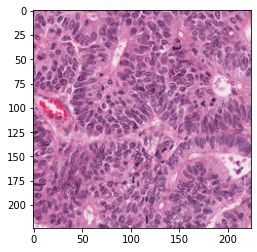

In [6]:
images, labels = next(iter(trainloader))

print(images.shape, labels.shape)
def imshow(img):
    inp = img.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    # plt.show()

imshow(images[0])

# Start to train

In [7]:
from trainer.baseline_trainer import BaseLineTrainer

In [8]:
model_trainer = BaseLineTrainer(trainloader, valloader)

In [9]:
import pytorch_lightning as pl

trainer = pl.Trainer()
trainer.fit(model_trainer)

INFO:lightning:GPU available: False, used: False
INFO:lightning:
   | Name                              | Type              | Params
--------------------------------------------------------------------
0  | model                             | BaseLineModel     | 11 M  
1  | model.model                       | ResNet            | 11 M  
2  | model.model.conv1                 | Conv2d            | 9 K   
3  | model.model.bn1                   | BatchNorm2d       | 128   
4  | model.model.relu                  | ReLU              | 0     
5  | model.model.maxpool               | MaxPool2d         | 0     
6  | model.model.layer1                | Sequential        | 147 K 
7  | model.model.layer1.0              | BasicBlock        | 73 K  
8  | model.model.layer1.0.conv1        | Conv2d            | 36 K  
9  | model.model.layer1.0.bn1          | BatchNorm2d       | 128   
10 | model.model.layer1.0.relu         | ReLU              | 0     
11 | model.model.layer1.0.conv2        | Conv2d   

[ 0  0 45 55]
{'accuracy': 49.0, 'precision': 1.0, 'recall': 0.49, 'f1_score': 0.6577181208053691}


/usr/local/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


INFO:lightning:Detected KeyboardInterrupt, attempting graceful shutdown...


1

In [ ]:
len(trainloader)